In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

SIMULATION_FOLDER = 'C:\\Users\\Admin\\Desktop\\phd\\multivariate_hawkes\\data\\simulations'


In [15]:
path = Path(SIMULATION_FOLDER)
method_simulation_subdirs = [
    d for d in path.rglob("")
    if d.is_dir() and not any(child.is_dir() for child in d.iterdir())
]

dfs_list = []
for method_simulation_subdir in method_simulation_subdirs:
    params = method_simulation_subdir.parts[-4:-1]

    dfs = []
    for file in method_simulation_subdir.glob('orderbook_changes_*.tsv'):
        df = pd.read_csv(file, sep='\t')
        dfs.append(df)
    
    df = pd.concat(dfs)
    df['error'] = (df['real'] - df['predicted']).abs()
    df['method'] = params[0][0:3]
    df['pair'] = params[1]
    df['param'] = params[2][-3:]

    dfs_list.append(df)

df = pd.concat(dfs_list)
df['method_param'] = df['method'] + '_' + df['param']
df = df.reset_index(drop=True)
df.head()

,real,predicted,error,method,pair,param,method_param
0,0.267,-24.410201,24.677201,mov,BTC_USD,120,mov_120
1,0.269,1.006849,0.737849,mov,BTC_USD,120,mov_120
2,0.497,1.004238,0.507238,mov,BTC_USD,120,mov_120
3,0.499,1.229087,0.730087,mov,BTC_USD,120,mov_120
4,0.721,1.226580,0.505580,mov,BTC_USD,120,mov_120


C:\Users\Admin\AppData\Local\Temp\ipykernel_15648\2956804594.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='method_param', y='error', row='pair', data=df, kind='box', height=3, aspect=4, sharey=False, palette=palette)


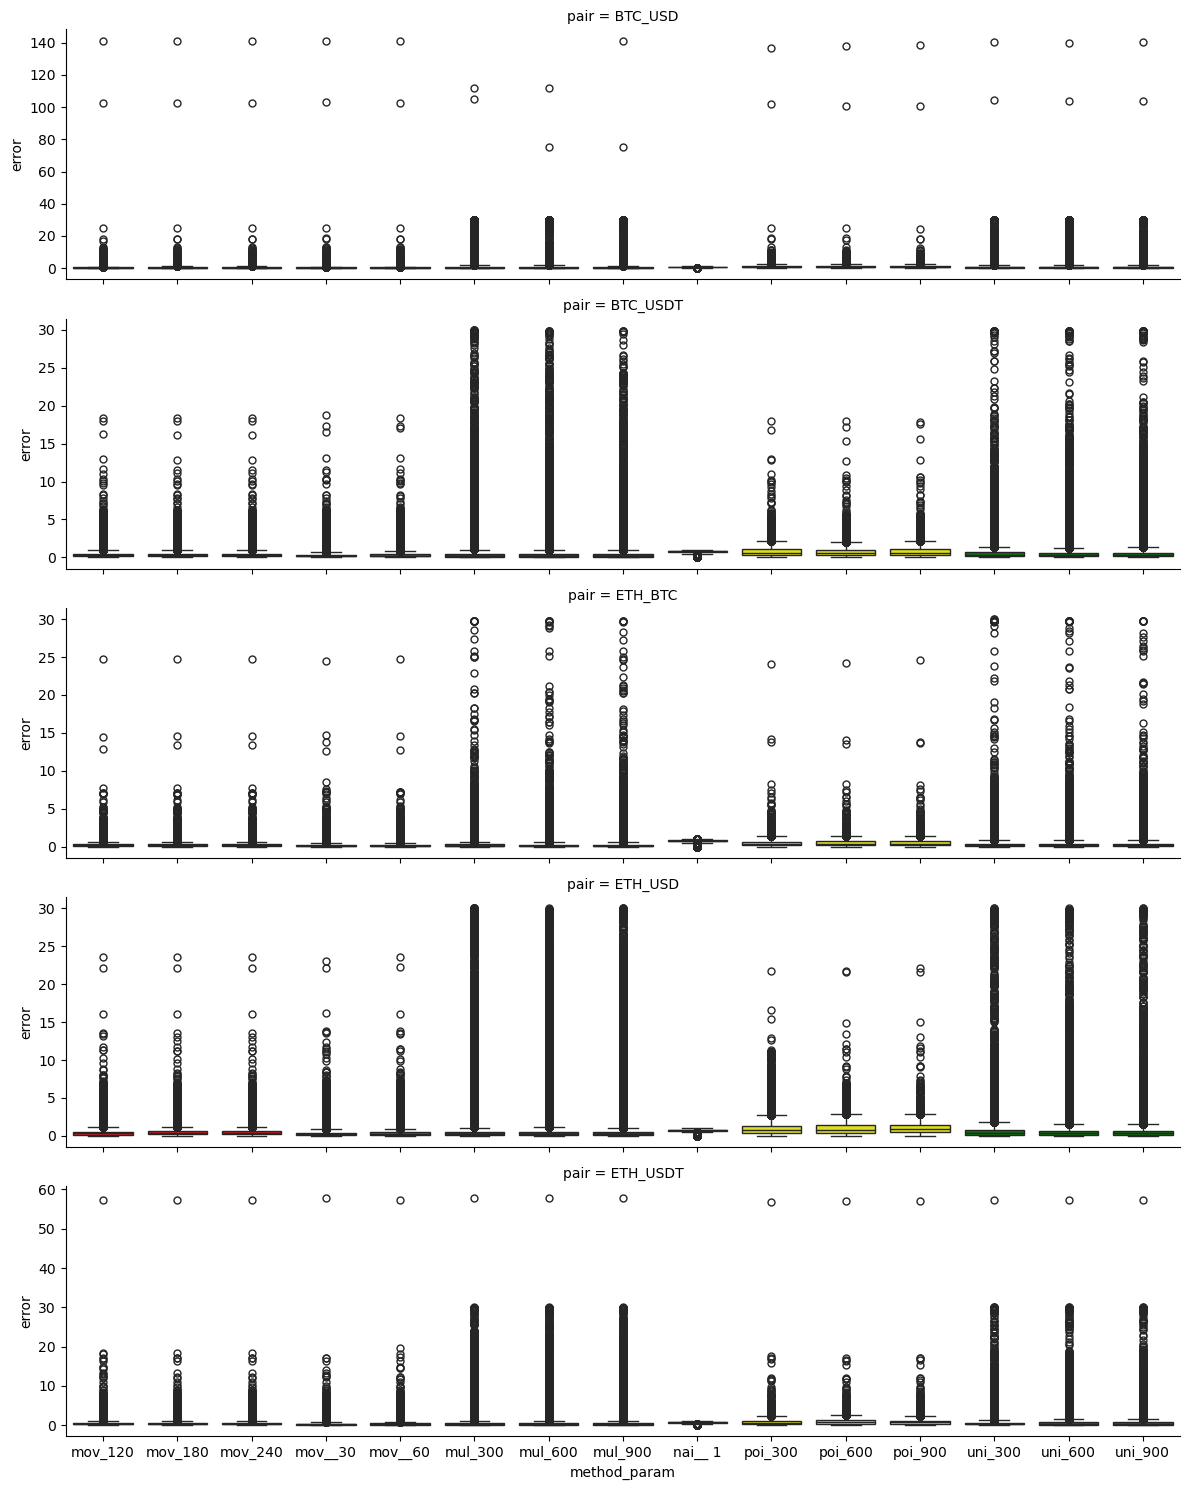

In [4]:
# Create a boxplot with 'method_param' on the x-axis, 'error' on the y-axis, and separate plots by 'pair'
unique_methods = df['method_param'].unique()
colors = ['red'] * 5 + ['blue'] * 3 + ['pink'] + ['yellow'] * 3 + ['green'] * 3

palette = dict(zip(unique_methods, colors))
sns.catplot(x='method_param', y='error', row='pair', data=df, kind='box', height=3, aspect=4, sharey=False, palette=palette)

# Show the plot
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_15648\3881248218.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='method_param', y='error', data=df_pair, palette=palette, showfliers=False)


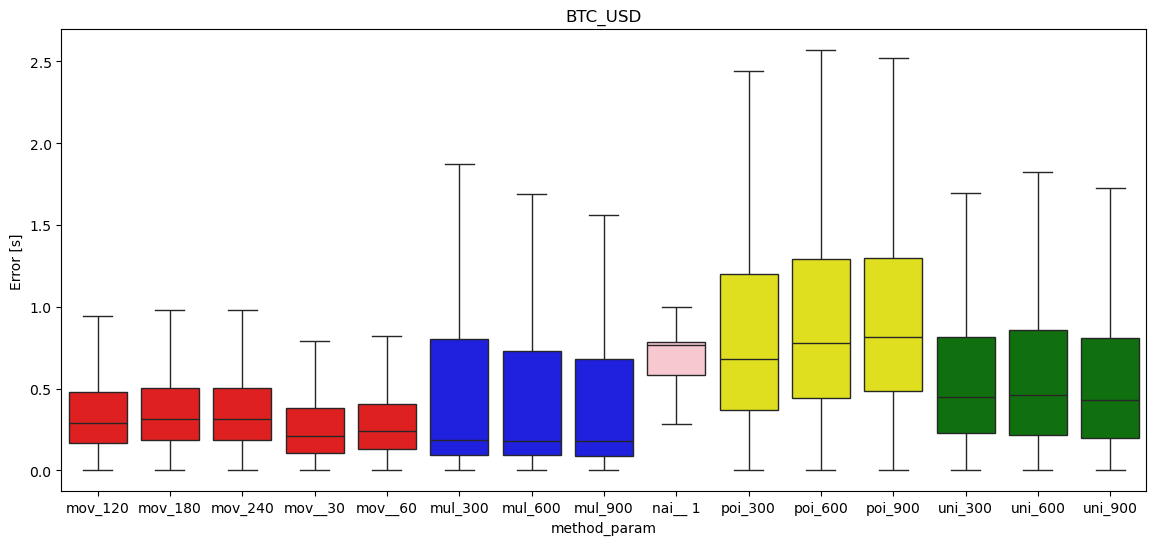

C:\Users\Admin\AppData\Local\Temp\ipykernel_15648\3881248218.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='method_param', y='error', data=df_pair, palette=palette, showfliers=False)


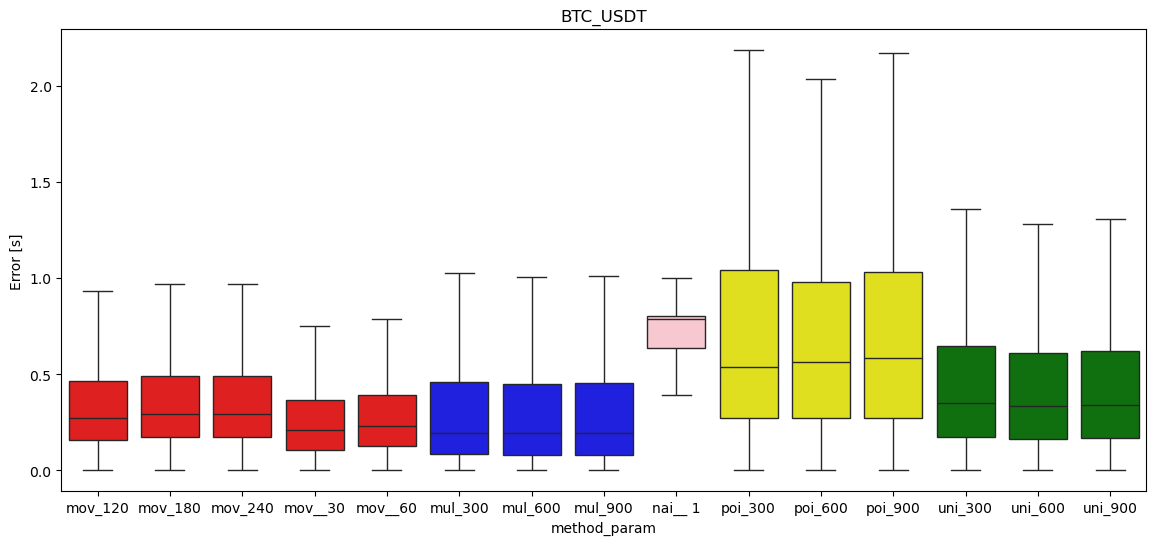

C:\Users\Admin\AppData\Local\Temp\ipykernel_15648\3881248218.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='method_param', y='error', data=df_pair, palette=palette, showfliers=False)


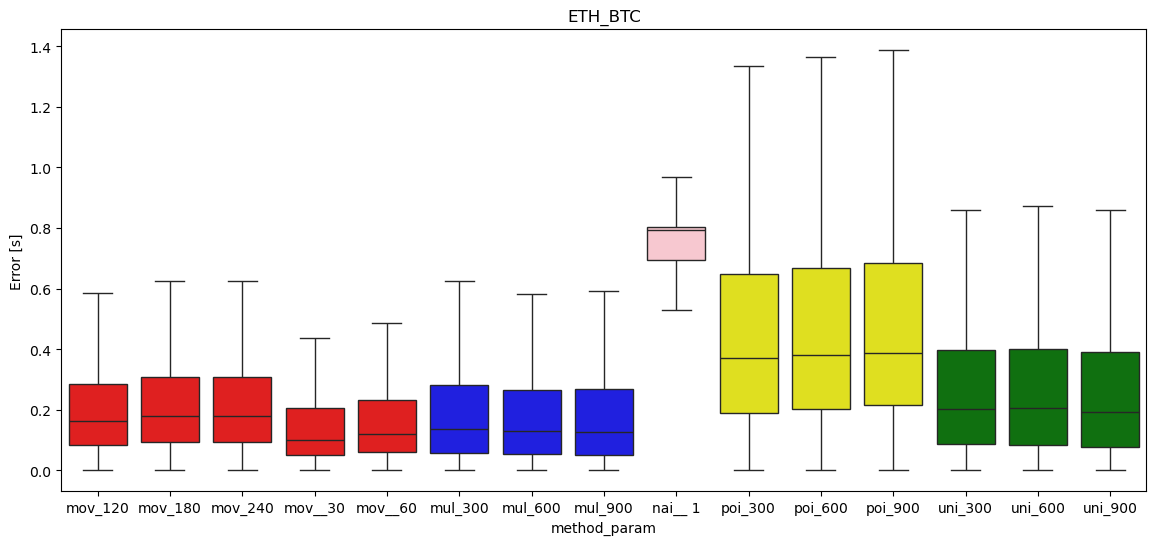

C:\Users\Admin\AppData\Local\Temp\ipykernel_15648\3881248218.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='method_param', y='error', data=df_pair, palette=palette, showfliers=False)


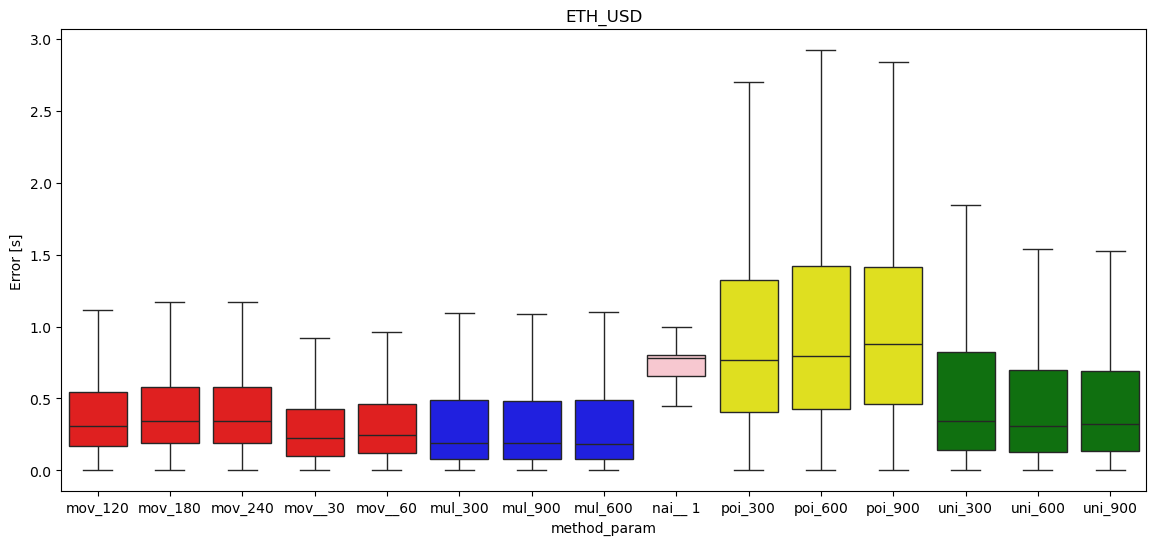

C:\Users\Admin\AppData\Local\Temp\ipykernel_15648\3881248218.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='method_param', y='error', data=df_pair, palette=palette, showfliers=False)


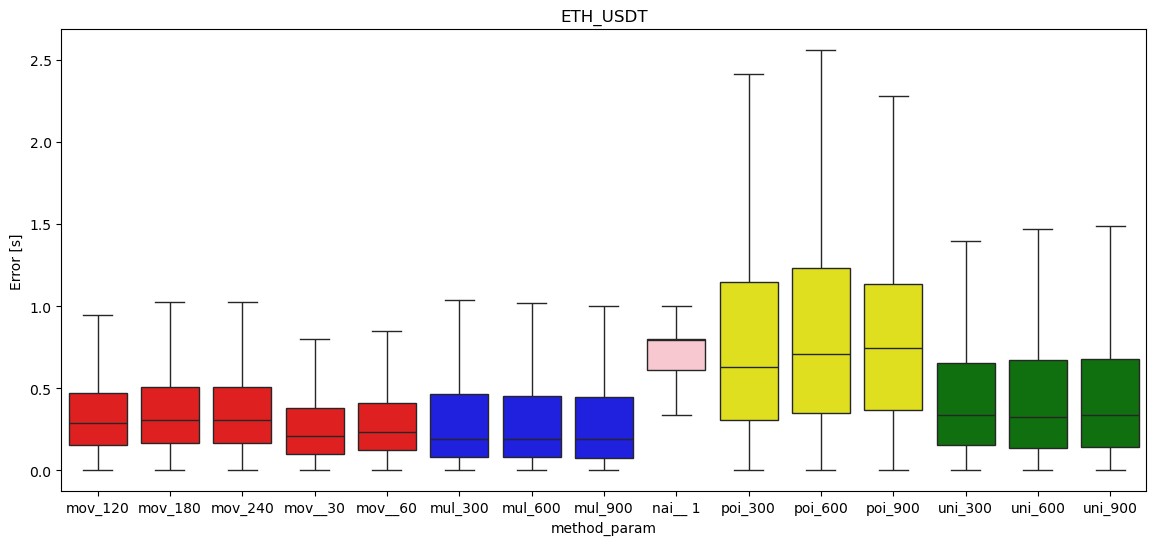

In [19]:
# Create a boxplot with 'method_param' on the x-axis, 'error' on the y-axis, and separate plots by 'pair'

for pair in df['pair'].unique():
    df_pair = df[df['pair'] == pair]
    unique_methods = df_pair['method_param'].unique()
    colors = ['red'] * 5 + ['blue'] * 3 + ['pink'] + ['yellow'] * 3 + ['green'] * 3

    palette = dict(zip(unique_methods, colors))
    plt.figure(figsize=(14, 6))
    sns.boxplot(x='method_param', y='error', data=df_pair, palette=palette, showfliers=False)
    plt.title(pair)
    plt.ylabel('Error [s]')
    plt.show()


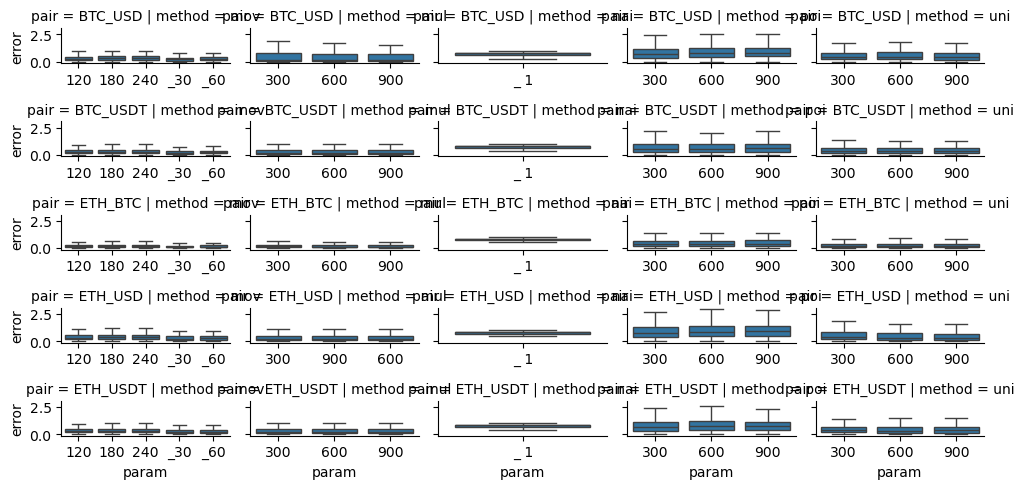

In [12]:
unique_counts = df.groupby(['pair', 'method'])['param'].nunique().reset_index(name='num_params')

# Create the catplot without showing it initially
g = sns.catplot(
    x='param', y='error', row='pair', col='method',
    data=df, kind='box', height=1, aspect=2, sharey=True,
    sharex=False, showfliers=False
)

plt.show()

idee: 
- trainare meglio multivariate per beta (BO, GA, particle swarm?)
- provare non prendendo periodi con piu secondi con piu eventi, ma abbastanza a caso (perchè con i primi non è detto che distribuzione training = distribuzione testing. Nemmeno con i secondi, però a sto punto tanto vale togliere assumpion. Anzi con i primi è piu difficile che distribuzione training = distribuzione testing). (possibili limiti tipo quando non c'è nessun evento?)
- si puo mettere qualcosina di automatica stile paper richi? visto che la sto studiando per esercitazioni